In [4]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


In [5]:
# load fashion_mnist dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

Preprocess Data

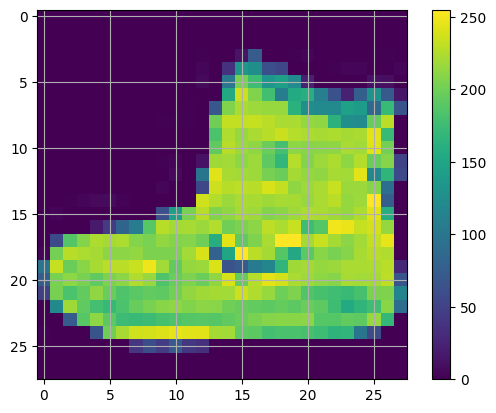

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid()
plt.show()

In [14]:
train_images = train_images/255.0
test_images = test_images /255.0

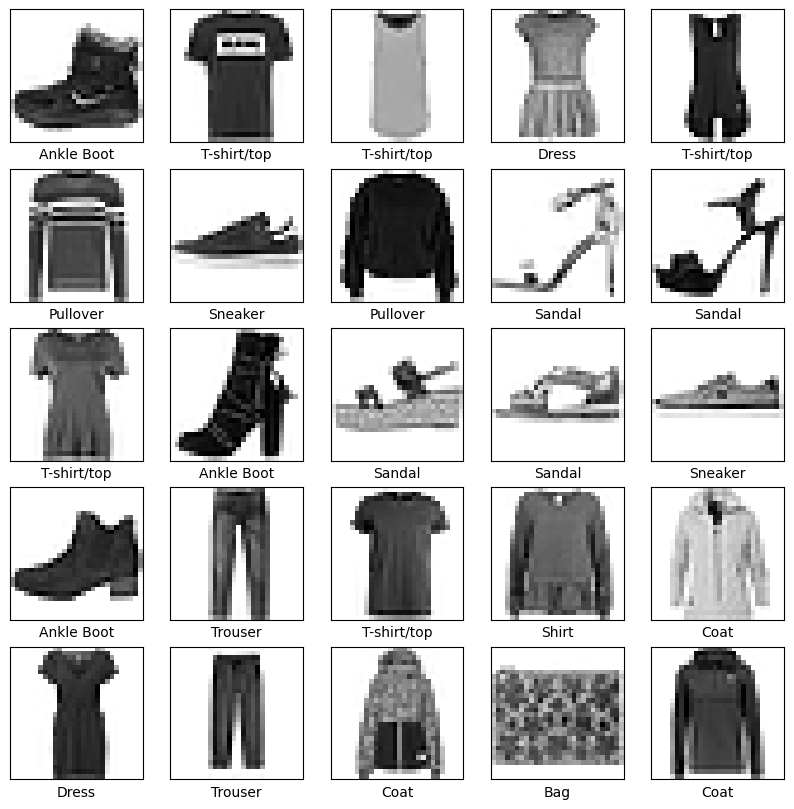

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

**Build the Model**

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [22]:
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5008 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3786 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3405 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3117 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2954 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2806 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2680 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2563 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2470 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.238

Evaluate Accuracy

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3294 - accuracy: 0.8837 - 714ms/epoch - 2ms/step

Test accuracy: 0.8837000131607056


Make Predictions

In [29]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [30]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [31]:
predictions[0]

array([3.1968231e-08, 1.4044807e-10, 3.8623906e-08, 7.7700575e-09,
       1.8988122e-07, 4.1674739e-03, 4.1042185e-06, 5.1164343e-03,
       3.9472121e-07, 9.9071133e-01], dtype=float32)

In [32]:
np.argmax(predictions[0])

9

In [33]:
test_labels[0]

9

In [34]:
class_names[9]

'Ankle Boot'

Define functions to graph the full set of 10 class predictions

In [35]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
    plt.xlabel("{}{:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
               color = color)
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


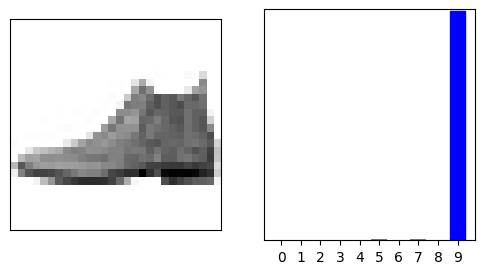

In [37]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

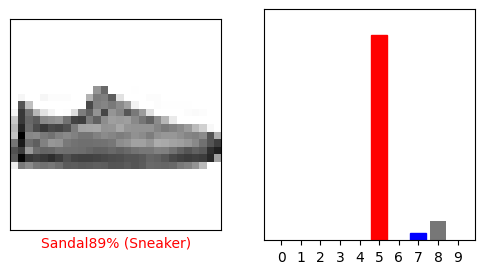

In [38]:
i = 12
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

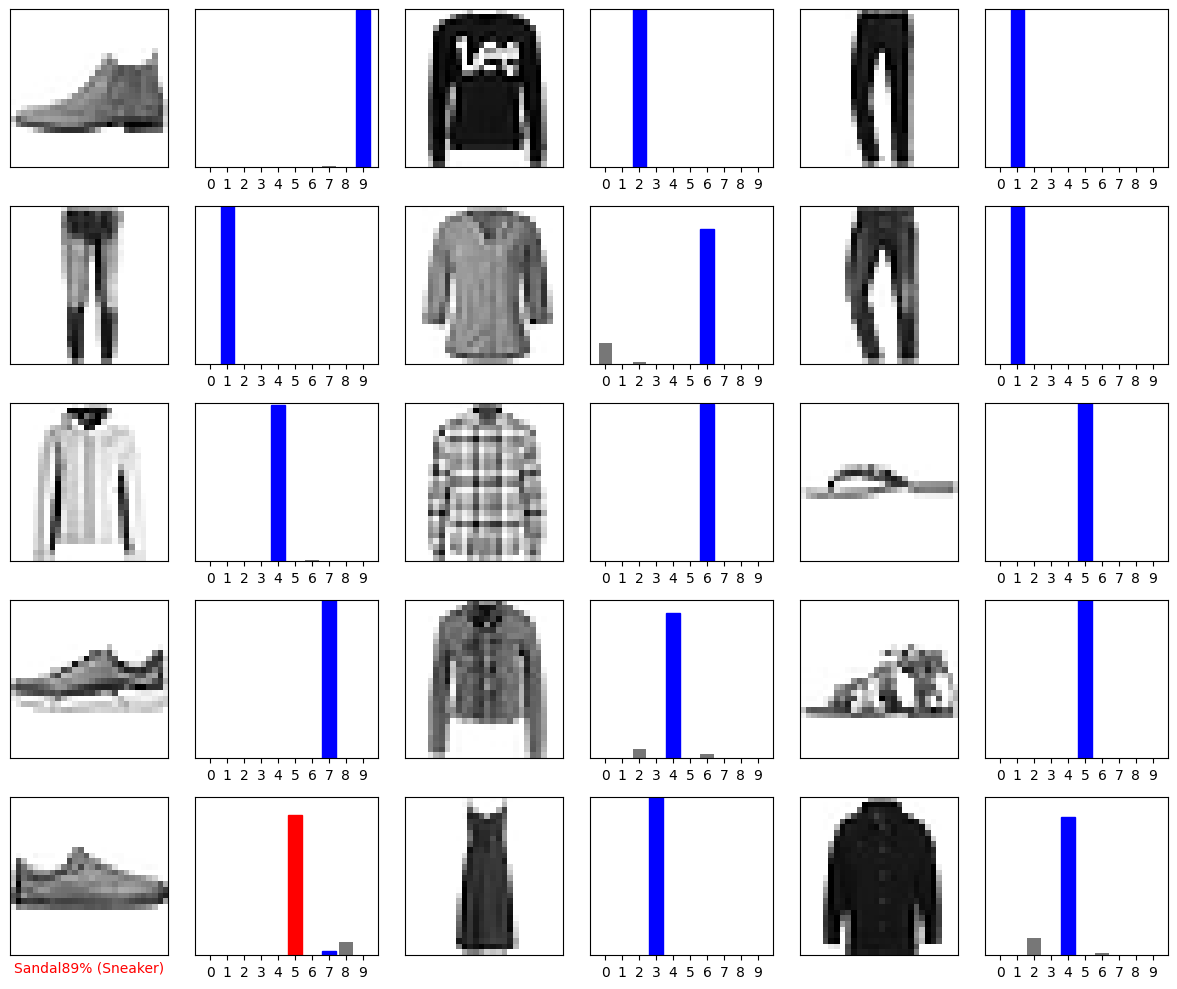

In [39]:
# plot the first X test images, their predicted labels and the true labels
# color correct predictions in blue and incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show

Use the trained model

In [45]:
# grab an image from the test dataset
img = test_images[1]

print(img.shape)

(28, 28)


In [46]:
# add the image to a batch where it's the only member
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [47]:
predictions_single = probability_model.predict(img)
print(predictions_single)


1/1 [==============================] - 0s 21ms/step
[[2.9530718e-06 4.2080332e-12 9.9987543e-01 4.0004957e-12 6.0569266e-05
  4.7218951e-13 6.1028251e-05 1.8893874e-19 9.7989444e-13 1.2033942e-18]]


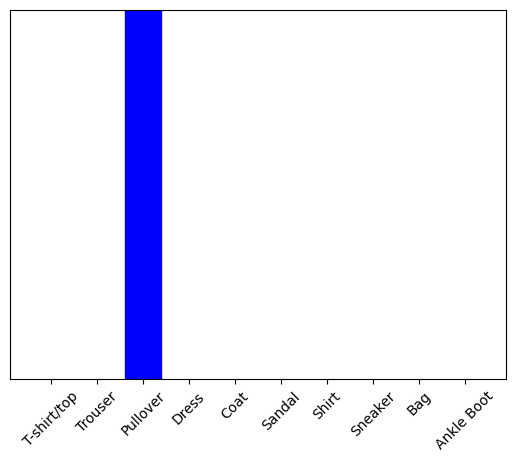

In [48]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)
plt.show()

In [49]:
np.argmax(predictions_single[0])

2